### 总结：利用好二叉搜索树的性质，即root->左子树 < root  < root->右子树 ：（中序遍历是升序）
### 递归三要素：1、明确递归终止条件；（基线条件）2、给出递归终止时的处理办法；（递归条件）3、提取重复的逻辑，缩小问题规模。

## 101. 对称二叉树

#### 给定一个二叉树，检查它是否是镜像对称的。

例如，二叉树 [1,2,2,3,4,4,3] 是对称的。



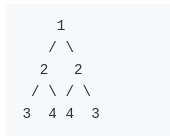

#### 判断二叉树是否是对称树，比如有两个节点n1, n2，我们需要比较n1的左子节点的值和n2的右子节点的值是否相等，同时还要比较n1的右子节点的值和n2的左子结点的值是否相等，以此类推比较完所有的左右两个节点。

In [ ]:
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode(int x) : val(x), left(NULL), right(NULL) {}
 * };
 */
class Solution {
public:
    bool isSymmetric(TreeNode* root) {
        //时间复杂度O(n)，空间复杂度O(n)
        if(!root)
            return true;
        return isSymmetric(root->left,root->right);
    }
    
    bool isSymmetric(TreeNode *left,TreeNode *right){
        if(!left&&!right)
            return true;
        if((left&&!right)||(!left&&right)||(left->val!=right->val))
            return false;
        return isSymmetric(left->left,right->right)&&isSymmetric(left->right,right->left);
            
    }
    
};

 迭代写法需要借助两个队列queue来实现，我们首先判空，如果root为空，直接返回true。否则将root的左右两个子结点分别装入两个队列，然后开始循环，循环条件是两个队列都不为空。在while循环中，我们首先分别将两个队列中的队首元素取出来，如果两个都是空结点，那么直接跳过，因为我们还没有比较完，有可能某个结点没有左子结点，但是右子结点仍然存在，所以这里只能continue。然后再看，如果有一个为空，另一个不为空，那么此时对称性已经被破坏了，不用再比下去了，直接返回false。若两个结点都存在，但是其结点值不同，这也破坏了对称性，返回false。否则的话将node1的左子结点和右子结点排入队列1，注意这里要将node2的右子结点和左子结点排入队列2，注意顺序的对应问题。最后循环结束后直接返回true，这里不必再去check两个队列是否同时为空，因为循环结束后只可能是两个队列均为空的情况，其他情况比如一空一不空的直接在循环内部就返回false了，参见代码如下：

In [ ]:
class Solution {
public:
    bool isSymmetric(TreeNode* root) {
        if (!root) return true;
        queue<TreeNode*> q1, q2;
        q1.push(root->left);
        q2.push(root->right);
        while (!q1.empty() && !q2.empty()) {
            TreeNode *node1 = q1.front(); 
            q1.pop();
            TreeNode *node2 = q2.front(); 
            q2.pop();
            if (!node1 && !node2) 
                continue;
            if((node1 && !node2) || (!node1 && node2)) 
                return false;
            if (node1->val != node2->val) 
                return false;
            q1.push(node1->left);
            q1.push(node1->right);
            q2.push(node2->right);
            q2.push(node2->left);
        }
        return true;
    }
};

## 98. 验证二叉搜索树

#### 给定一个二叉树，判断其是否是一个有效的二叉搜索树。

假设一个二叉搜索树具有如下特征：

节点的左子树只包含小于当前节点的数。
节点的右子树只包含大于当前节点的数。
所有左子树和右子树自身必须也是二叉搜索树。
示例 1:

输入:
    2
   / \
  1   3
输出: true

In [ ]:
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode(int x) : val(x), left(NULL), right(NULL) {}
 * };
 */
class Solution {
public:
    bool isValidBST(TreeNode* root) {
        //时间复杂度O(n)，空间复杂度O(n)
        return isValidDF(root,LONG_MIN,LONG_MAX);
    }
    bool isValidDF(TreeNode *root,long mn,long mx){
        if(!root)
            return true;
        if(root->val<=mn||root->val>=mx)
            return false;
        return isValidDF(root->right,root->val,mx)&&isValidDF(root->left,mn,root->val);
    }
    
};

In [ ]:
// Recursion
class Solution {
public:
    bool isValidBST(TreeNode* root) {
        if (!root) return true;
        vector<int> vals;
        inorder(root, vals);
        for (int i = 0; i < vals.size() - 1; ++i) {
            if (vals[i] >= vals[i + 1]) return false;
        }
        return true;
    }
    //中序遍历后检查是否是升序
    void inorder(TreeNode* root, vector<int>& vals) {
        if (!root) return;
        inorder(root->left, vals);
        vals.push_back(root->val);
        inorder(root->right, vals);
    }
};

In [ ]:
class Solution {
public:
    bool isValidBST(TreeNode* root) {
        stack<TreeNode*> s;
        TreeNode *p = root, *pre = NULL;
        while (p || !s.empty()) {
            while (p) {
                s.push(p);
                p = p->left;
            }
            p = s.top(); s.pop();
            if (pre && p->val <= pre->val) return false; //非递归的中序遍历，并在遍历过程中作判别。
            pre = p;
            p = p->right;
        }
        return true;
    }
};

## 230. 二叉搜索树中第K小的元素

### 给定一个二叉搜索树，编写一个函数 kthSmallest 来查找其中第 k 个最小的元素。

说明：
你可以假设 k 总是有效的，1 ≤ k ≤ 二叉搜索树元素个数。


In [ ]:
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode(int x) : val(x), left(NULL), right(NULL) {}
 * };
 */
class Solution {
public:
    int kthSmallest(TreeNode* root, int k) {
        //时间复杂度O(n)，空间复杂度O(n)
        int count=0;
        stack<TreeNode*> q;
        TreeNode *cur=root;
        while(cur||!q.empty()){
            while(cur){
                q.push(cur);
                cur=cur->left;
            }
            cur=q.top();
            q.pop();
            ++count;
            if(count==k)//中序遍历过程中计数，返回第k个值。
                return cur->val;
            cur=cur->right;
        }
        return 0;
    }
    
};